In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the dataset
df = pd.read_csv('Billionaires Statistics Dataset.csv', index_col='rank')
# df.head()

In [3]:
# Select relevant columns for correlation analysis
selected_columns = ['finalWorth', 'age', 'total_tax_rate_country', 'gdp_country', 'population_country']

# Compute the correlation matrix
correlation_matrix = df[selected_columns].corr()

print(correlation_matrix)

                        finalWorth       age  total_tax_rate_country  \
finalWorth                1.000000  0.067053               -0.036381   
age                       0.067053  1.000000               -0.151771   
total_tax_rate_country   -0.036381 -0.151771                1.000000   
population_country       -0.053024 -0.167812                0.644155   

                        population_country  
finalWorth                       -0.053024  
age                              -0.167812  
total_tax_rate_country            0.644155  
population_country                1.000000  


C:\Users\nh23abh\AppData\Local\Temp\ipykernel_15744\381576524.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[selected_columns].corr()


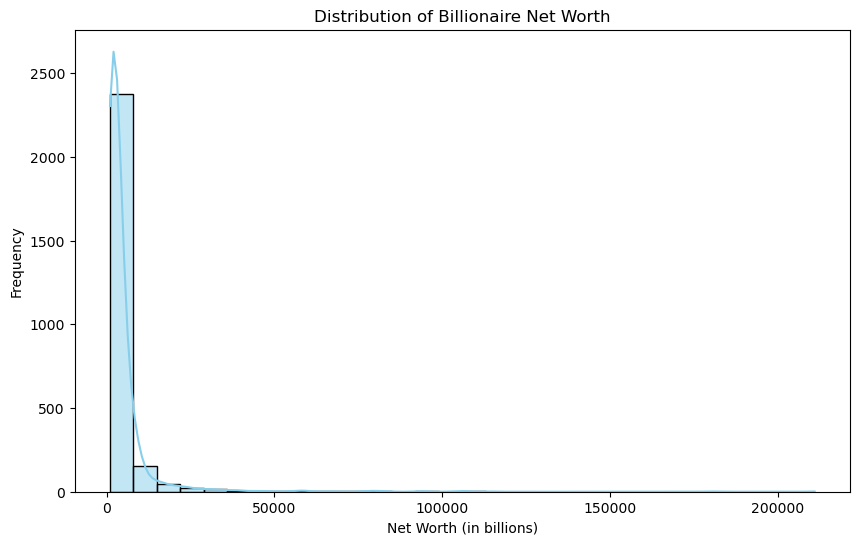

In [4]:
# Plot 1: Distribution of Billionaire Net Worth
plt.figure(figsize=(10, 6))
sns.histplot(df['finalWorth'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Billionaire Net Worth')
plt.xlabel('Net Worth (in billions)')
plt.ylabel('Frequency')
plt.savefig('figure-1.png')
plt.show()

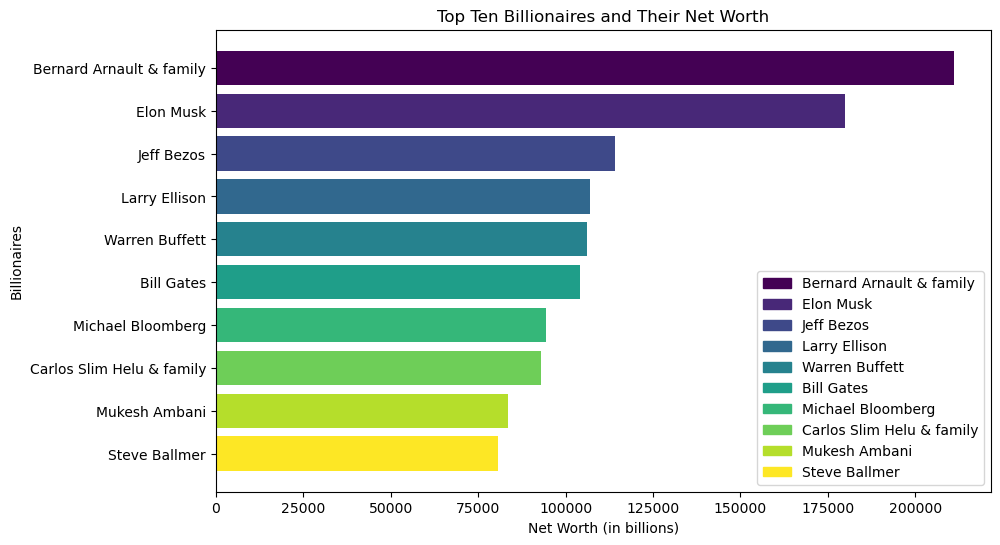

In [18]:
# Sort the dataframe by net worth in descending order and select the top ten billionaires
top_ten_billionaires = df.nlargest(10, 'finalWorth')

# Create a sub dataframe with required columns
sub_df = top_ten_billionaires[['finalWorth', 'personName', 'country', 'age']]

# Define a gradient of colors
colors = plt.cm.viridis(np.linspace(0, 1, len(sub_df)))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(sub_df['personName'], sub_df['finalWorth'], color=colors)
plt.xlabel('Net Worth (in billions)')
plt.ylabel('Billionaires')
plt.title('Top Ten Billionaires and Their Net Worth')

# Add legend indicating billionaire names and their respective colors
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, sub_df['personName'], loc='lower right')

plt.gca().invert_yaxis()  # Invert y-axis to display the richest at the top
plt.savefig('figure-2.png')
plt.show()

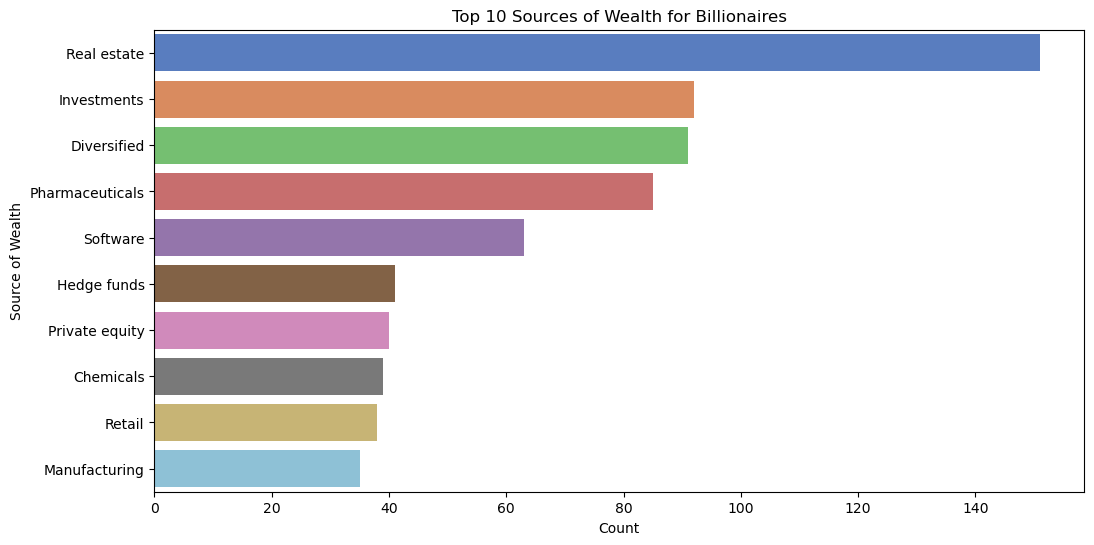

In [13]:
# Plot 3: Source of Wealth
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='source', order=df['source'].value_counts().index[:10], palette='muted')
plt.title('Top 10 Sources of Wealth for Billionaires')
plt.xlabel('Count')
plt.ylabel('Source of Wealth')
plt.savefig('figure-3.png')
plt.show()

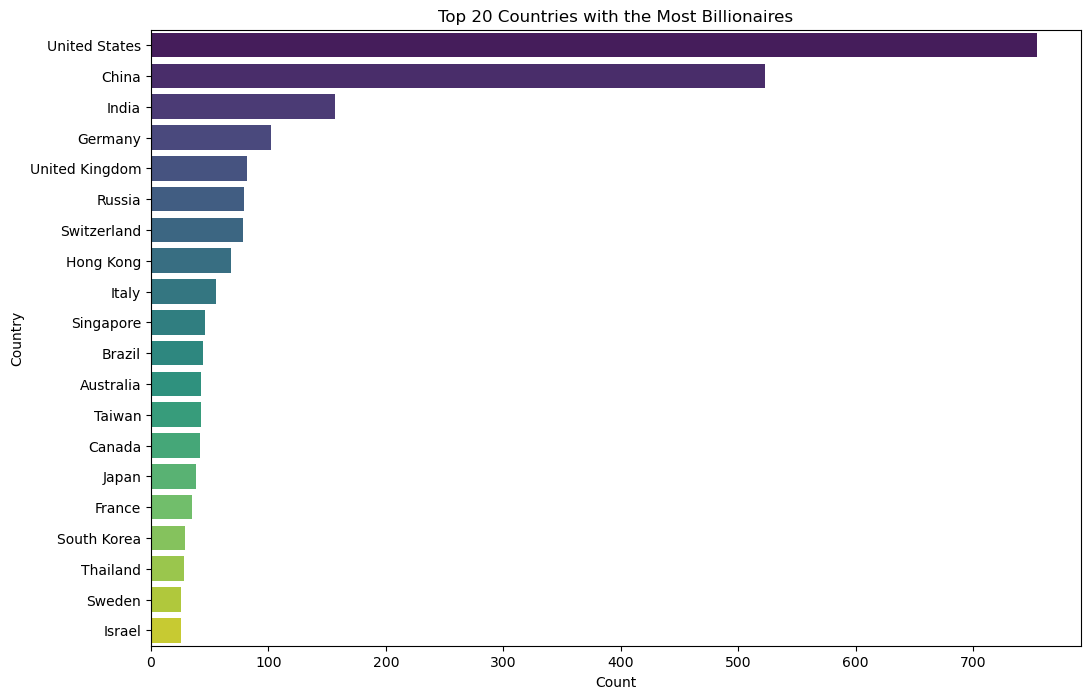

In [11]:
# Plot: Count of Billionaires by Country
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='country', order=df['country'].value_counts().index[:20], palette='viridis')
plt.title('Top 20 Countries with the Most Billionaires')
plt.xlabel('Count')
plt.ylabel('Country')
plt.savefig('figure-4.png')
plt.show()

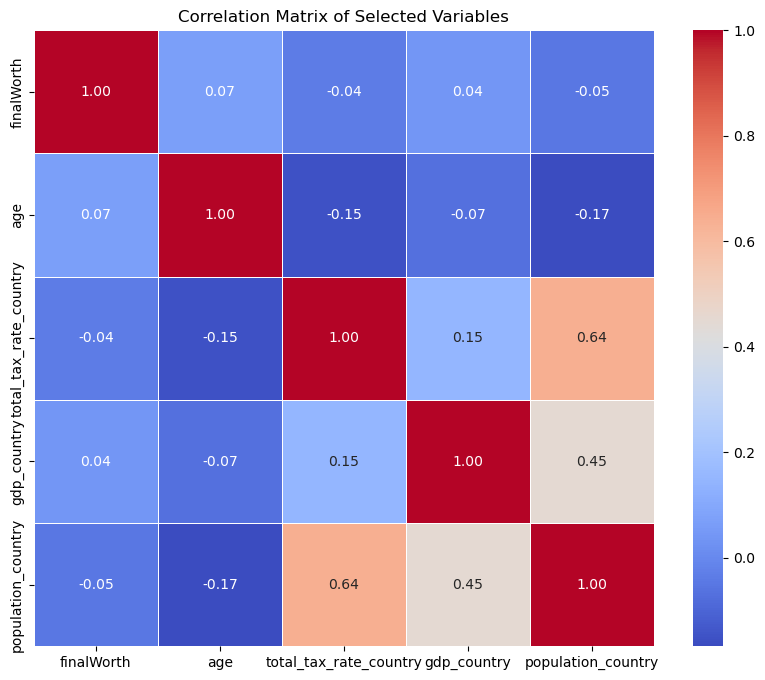

In [5]:
# Remove non-numeric characters from 'gdp_country' column and convert to float
df['gdp_country'] = df['gdp_country'].replace('[\$,]', '', regex=True).astype(float)

# Select relevant columns for correlation analysis
selected_columns = ['finalWorth', 'age', 'total_tax_rate_country', 'gdp_country', 'population_country']

# Compute the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Selected Variables')
plt.savefig('figure-5.png')
plt.show()